# WeatherPy
----
#### Analyis
Observed Trends
1.  Increasing latitude in the northern hemisphere directly correlates with decreasing temperatures; but has the opposite effect of increasing temperatures in the southern hemisphere
2.  Excluding temperature it is recommended that another variable other than latitude be tested against: wind speed, cloudiness, and humidity
3.  Although weak, there is a stronger correlation in the southern hemisphere for latitude vs cloudiness than in the northern hemisphere

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# List/Variables setup
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record_counter = 0
set_counter = 1

# Start of Log
print("Beginning Data Retrieval")
print("-----------------------------")

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

#----BEGIN Loop----
# Looping through cities and appending to lists
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        # Setting limit of records per set
        if record_counter > 49:
            record_counter = 0
            set_counter += 1
        else:
            record_counter += 1
            
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    
    except(KeyError, IndexError):
        print("City not found. Skipping...")

#----END Loop-----

# End of Log
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | tabuk
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | port-gentil
City not found. Skipping...
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | port hardy
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | chapais
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | tautira
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | nhulunbuy
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | navalmoral de la mata
Processing Record 19 of Set 1 | yenagoa
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | rawson
Processing Record 22 of Set 1 | carnarvon
Processi

Processing Record 36 of Set 4 | port lincoln
Processing Record 37 of Set 4 | pilar
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | saryagash
Processing Record 40 of Set 4 | new norfolk
Processing Record 41 of Set 4 | mehamn
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | charyshskoye
City not found. Skipping...
Processing Record 44 of Set 4 | carutapera
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | bengkulu
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | kruisfontein
Processing Record 49 of Set 4 | yellowknife
Processing Record 50 of Set 4 | iracoubo
Processing Record 0 of Set 5 | nichinan
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | grand-santi
Processing Record 3 of Set 5 | yerbogachen
Processing Record 4 of Set 5 | sechura
Processing Record 5 of Set 5 | qeshm
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of 

Processing Record 16 of Set 8 | shimsk
Processing Record 17 of Set 8 | bocas del toro
Processing Record 18 of Set 8 | corn island
Processing Record 19 of Set 8 | toguchin
Processing Record 20 of Set 8 | florence
Processing Record 21 of Set 8 | bien hoa
Processing Record 22 of Set 8 | kalmunai
City not found. Skipping...
Processing Record 23 of Set 8 | itoman
Processing Record 24 of Set 8 | xining
Processing Record 25 of Set 8 | maceio
Processing Record 26 of Set 8 | saiha
Processing Record 27 of Set 8 | menongue
Processing Record 28 of Set 8 | catuday
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | xiongyue
Processing Record 31 of Set 8 | juba
Processing Record 32 of Set 8 | teshie
Processing Record 33 of Set 8 | pangody
City not found. Skipping...
Processing Record 34 of Set 8 | imeni poliny osipenko
City not found. Skipping...
Processing Record 35 of Set 8 | peniche
Processing Record 36 of Set 8 | high level
Processing Record 37 of Set 8 | kyren
Processing Re

Processing Record 3 of Set 12 | kirkenes
Processing Record 4 of Set 12 | berja
Processing Record 5 of Set 12 | kichmengskiy gorodok
Processing Record 6 of Set 12 | atasu
Processing Record 7 of Set 12 | ternate
Processing Record 8 of Set 12 | benghazi
Processing Record 9 of Set 12 | pio xii
Processing Record 10 of Set 12 | pacific grove
Processing Record 11 of Set 12 | borzna
Processing Record 12 of Set 12 | dakar
Processing Record 13 of Set 12 | da lat
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 12 | baturaden
Processing Record 15 of Set 12 | inongo
City not found. Skipping...
Processing Record 16 of Set 12 | yulara
Processing Record 17 of Set 12 | srivardhan
Processing Record 18 of Set 12 | belyy yar
Processing Record 19 of Set 12 | fiche
Processing Record 20 of Set 12 | dekar
Processing Record 21 of Set 12 | kayerkan
Processing Record 22 of Set 12 | ginir
Processing Record 23 of Set 12 | anloga
Processing Record 24 of Set 12 | praia da vitoria


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Making dataframe
weatherDF = pd.DataFrame({
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date   
})

weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,-5.57,84,100,2.30,CA,1650126710
1,Tabuk,17.4189,121.4443,73.44,89,100,4.32,PH,1650126711
2,Punta Arenas,-53.1500,-70.9167,46.51,61,40,3.44,CL,1650126711
3,Busselton,-33.6500,115.3333,59.90,75,75,11.70,AU,1650126712
4,Port-Gentil,-0.7193,8.7815,82.27,76,91,7.16,GA,1650126712


In [5]:
# Describing dataframe
stats = weatherDF.describe(include="all")
statsDF = stats.drop(columns=["City","Country"],index=["unique","top","freq"])
statsDF

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,19.513854,22.323950,60.671966,68.750847,59.045763,8.493339,1.650127e+09
std,33.045570,88.584277,23.147552,21.702510,38.054598,5.730488,8.531841e+01
min,-54.800000,-179.166700,-13.700000,5.000000,0.000000,0.000000,1.650126e+09
25%,-7.500025,-54.194150,45.537500,58.000000,20.000000,3.965000,1.650127e+09
50%,22.728800,26.329000,66.830000,73.000000,73.000000,7.045000,1.650127e+09
75%,47.333675,102.724550,78.800000,85.000000,98.000000,11.875000,1.650127e+09
max,78.218600,179.316700,102.960000,100.000000,100.000000,33.020000,1.650127e+09


In [6]:
weatherDF.to_csv("../output_data/city_data.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidDF = weatherDF.loc[(weatherDF["Humidity"]>100),:]
humidDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidDF.index

Int64Index([], dtype='int64')

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weatherDF.drop(humidDF.index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,-5.57,84,100,2.30,CA,1650126710
1,Tabuk,17.4189,121.4443,73.44,89,100,4.32,PH,1650126711
2,Punta Arenas,-53.1500,-70.9167,46.51,61,40,3.44,CL,1650126711
3,Busselton,-33.6500,115.3333,59.90,75,75,11.70,AU,1650126712
4,Port-Gentil,-0.7193,8.7815,82.27,76,91,7.16,GA,1650126712


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder

## Latitude vs. Temperature Plot

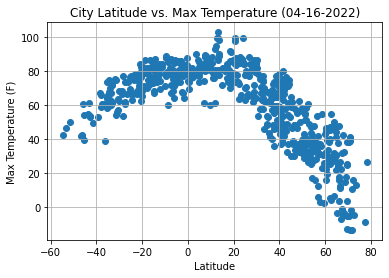

In [18]:
# Setup variable for time chart was run
dateLabel = time.strftime("%m-%d-%Y", time.localtime())

x = clean_city_data["Lat"]
t = clean_city_data["Max Temp"]
plt.scatter(x,t)
plt.title(f"City Latitude vs. Max Temperature ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Temperature")
plt.show()

Temperature increases as you approach equator and decreases as you move away.

## Latitude vs. Humidity Plot

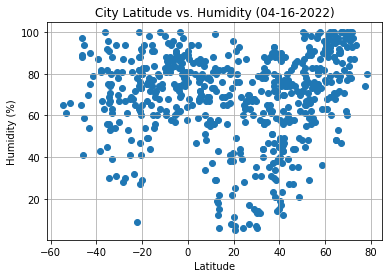

In [19]:

h = clean_city_data["Humidity"]
plt.scatter(x,h)
plt.title(f"City Latitude vs. Humidity ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Humidity")
plt.show()

Hard to tell if latitude has relation ship with humidity, there is a cluster of high humidity with increase in latitude.

## Latitude vs. Cloudiness Plot

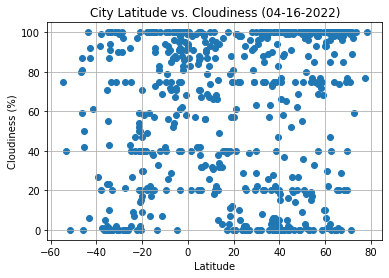

In [20]:

c = clean_city_data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"City Latitude vs. Cloudiness ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Cloudiness")
plt.show()

Cannot determine anything from the plot, hard to compare latitude and cloudiness.

## Latitude vs. Wind Speed Plot

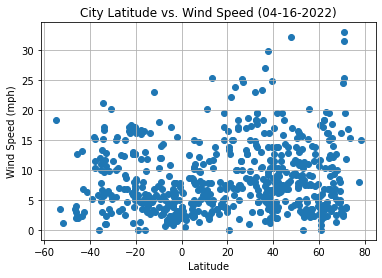

In [21]:
w = clean_city_data["Wind Speed"]
plt.scatter(x,w)
plt.title(f"City Latitude vs. Wind Speed ({dateLabel})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/Latitude_vs_Windspeed")
plt.show()

Even distribution of wind speed by latitude, some outliers in the higher latitudes.

## Linear Regression

In [22]:
# Making dataframe for each hemisphere
northHemi = clean_city_data.loc[clean_city_data["Lat"] >= 0,:]
southHemi = clean_city_data.loc[clean_city_data["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8565492516518622


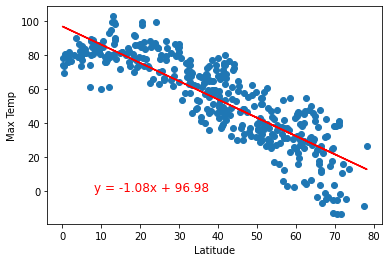

In [31]:

nx = northHemi["Lat"]
nt = northHemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx,nt)
regress_values = nx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx,nt)
plt.plot(nx,regress_values,"r-")
plt.annotate(line_eq,(8,0),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Images/NorthernHemisphere_Latitude_vs_MaxTemp")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

Strong correlation with latitude and temperature in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7723345642841619


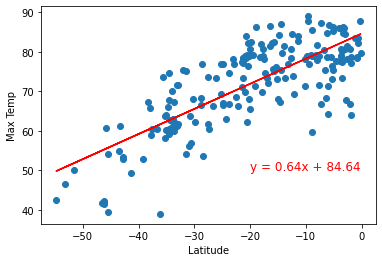

In [34]:
sx = southHemi["Lat"]
st = southHemi["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx,st)
regress_values = sx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx,st)
plt.plot(sx,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.savefig("../Images/SouthernHemisphere_Latitude_vs_MaxTemp")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

Strong correlation with latitude and temperature in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3036686735139129


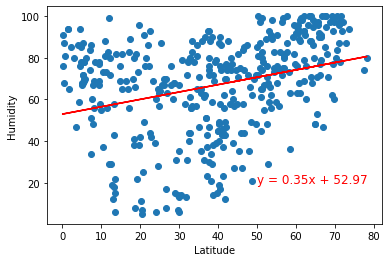

In [37]:
nh = northHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx,nh)
regress_values = nx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx,nh)
plt.plot(nx,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../Images/NorthernHemisphere_Latitude_vs_Humidity")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

Weak correlation with latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2236493518317334


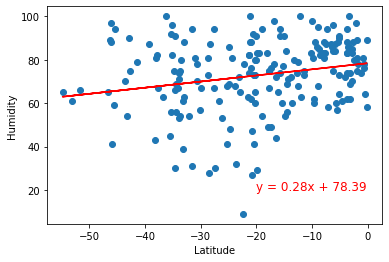

In [44]:
sh = southHemi["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx,sh)
regress_values = sx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx,sh)
plt.plot(sx,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../Images/SouthernHemisphere_Latitude_vs_Humidity")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

None or very weak correlation with latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12112588350903514


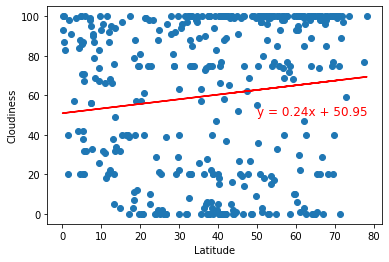

In [40]:
nc = northHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx,nc)
regress_values = nx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx,nc)
plt.plot(nx,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/NorthernHemisphere_Latitude_vs_Cloudiness")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

None or very weak correlation with latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32252817638998216


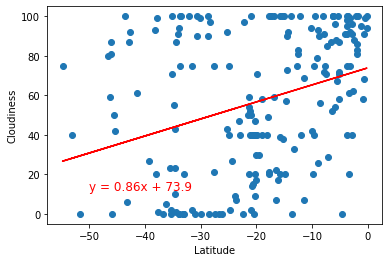

In [51]:
sc = southHemi["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx,sc)
regress_values = sx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx,sc)
plt.plot(sx,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("../Images/SouthernHemisphere_Latitude_vs_Cloudiness")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

Weak correlation with latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10206216955992276


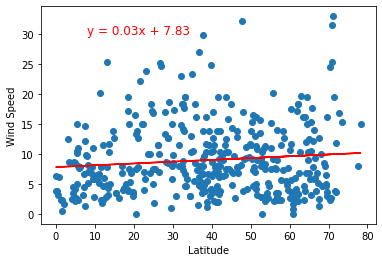

In [42]:
nw = northHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nx,nw)
regress_values = nx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nx,nw)
plt.plot(nx,regress_values,"r-")
plt.annotate(line_eq,(8,30),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../Images/NorthernHemisphere_Latitude_vs_WindSpeed")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

None or very weak correlation with latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1950934885265201


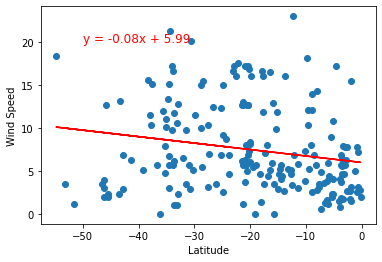

In [53]:
sw = southHemi["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(sx,sw)
regress_values = sx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sx,sw)
plt.plot(sx,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("../Images/SouthernHemisphere_Latitude_vs_WindSpeed")

print(f"The r-value \033[34mis\033[0m: {rvalue}")

None or very weak correlation with latitude and wind speed in the southern hemisphere.